Support material for the book __Perturbation Methods from a Backward Error Point of View__ by Robert M. Corless and Nicolas Fillion, in preparation.

Copyright (c) 2024 Robert M. Corless

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



In this notebook we solve the exercise

The approximation $\sin(\theta) \approx \theta$ is used _very_ frequently to make the life of the problem solver easier.  For instance, instead of solving the simple pendulum equation $\ddot{y} + \sin y = 0$, one hopes that the amplitude of oscillation (i.e., the initial angle $y(0)=A$ that the pendulum has when it is released with zero velocity) is "small" and one replaces $\sin y$ with $y$, giving the simple harmonic oscillator equation $\ddot{y} + y = 0$ instead. This exercise asks you to use backward error to explore how good an idea this is.  Specifically, suppose that the initial conditions are $y(0) = A$ and $\dot{y}(0)=0$.  Then the simple harmonic oscillator solution is $y(t) = A\cos t$.  Choose a range of values for the amplitude $A$ and investigate the size of the residual  $r(t,A) = \ddot{y}+\sin y = -A\cos t + \sin(A\cos t)$, and draw conclusions therefrom.

If you like, you can also compare the exact solution, from~\cite[pp.114--117]{Lawden(2013)}, which is (if the pendulum is started at angle $A$ with $|A| < \pi$, so the pendulum actually oscillates)
\begin{equation}
    y(t) = 2 \mathrm{arcsin}\left( k \mathrm{sn}( t+T/4, k )\right)
\end{equation}
where $k = \sin (A/2)$.  Maple uses the name __JacobiSN__ for the sn function.

You should find that you don't need to know about Jacobian elliptic functions to evaluate whether or not the approximation $\sin y \approx y$ is useful for a particular $A$.  Write a paragraph explaining your thoughts on the matter.

                     residual := -A cos(t) + sin(A cos(t))

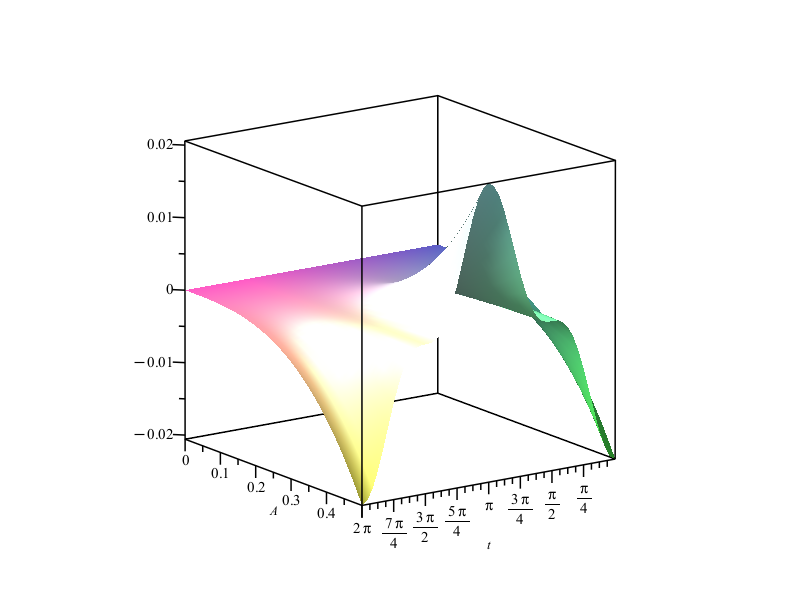

In [1]:
y := A*cos(t);
residual := diff(y,t,t) + sin(y);
plot3d( residual, t=0..2*Pi, A=0..0.5 );

kilobytes used=5411, alloc=10801, time=0.66

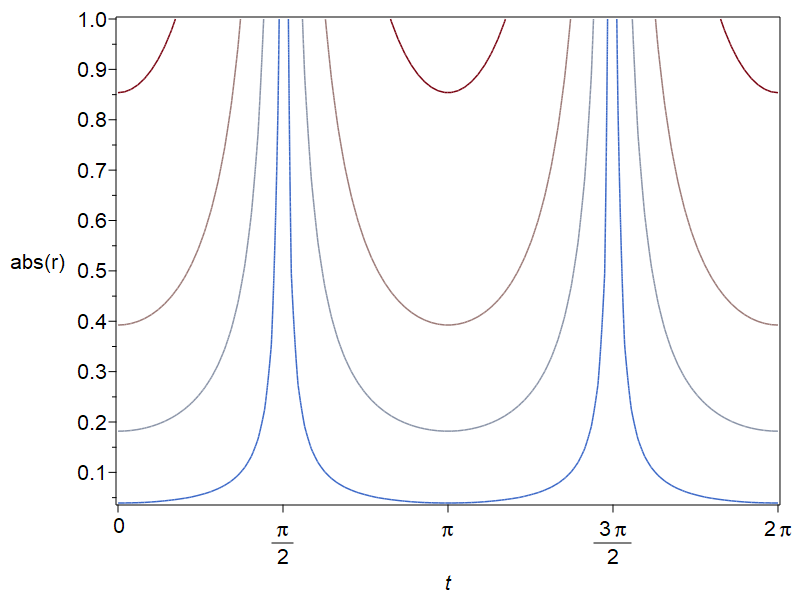

In [2]:
plots[contourplot]( log[10](abs(residual)), t=0..2*Pi, 
                    A=0..1, contours=[-5,-3,-2,-1],
                    labels=[t,abs(r)], 
                    tickmarks=[spacing(Pi/2),default],
                    grid=[100,100]);

From the above two plots, we see that if $A < 0.4$ approximately, we get a residual less than about $10^{-2}$.  That is, if the initial angle of the pendulum is less than 40 percent of a radian, which is a bit less than 23 degrees, then the approximation $\sin y \approx y$ changes the equation we are solving by less than one percent.  Near the times $t = \pi/2$ and $t = 3\pi/2$ where the pendulum swings past its lowest point, which is $y=0$, this makes the least difference.  This makes sense.

We also need to think about whether such small errors can _accumulate_ and whether or not they make a large difference to the solution, eventually. And, in this case, they do.  Without using the Jacobian elliptic functions, we can turn the problem around and think of $\sin(y)$ as a perturbation of $y$, and investigate the cumulative effect of the residual in the _simple_ harmonic oscillator: $\ddot{y} + y = y_0 -\sin y_0 = -r(t)$ and, using the Green's function we can estimate the difference $E(t) = y(t) - A\cos t$ by numerical evaluation of the integral
\begin{equation}
E(t) = \int_{\tau=0}^t \sin(t-\tau) r(\tau) d\tau .
\end{equation}


In [3]:
E := Int( sin(t-tau)*eval(-residual,t=tau), tau=0..t );

$$\int_{0}^{t}\sin \left(t -\tau \right) \left(A \cos \left(\tau \right)-\sin \left(A \cos \left(\tau \right)\right)\right)d \tau$$

kilobytes used=8731, alloc=18635, time=1.08

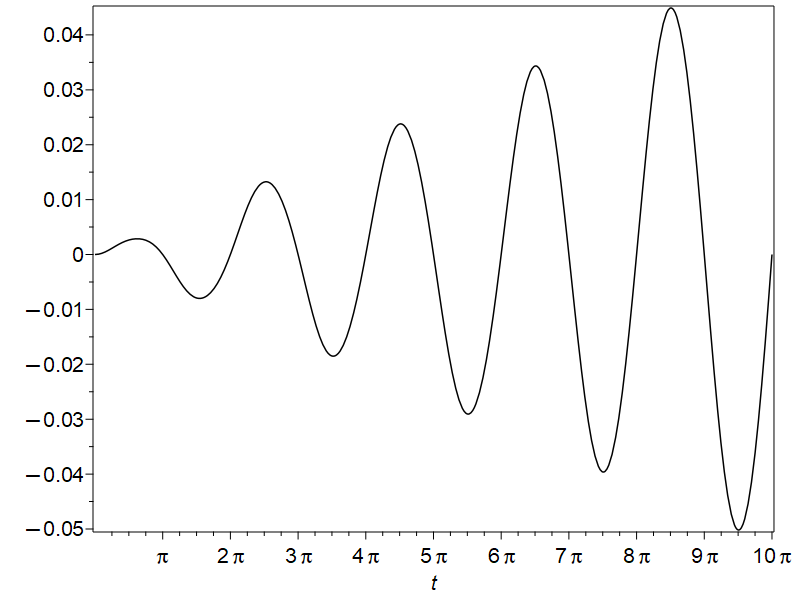

In [4]:
plot( eval(E,A=0.3), t=0..10*Pi );

Even for $A=0.3$, where the residual is small, we see that the difference between the solution to the original pendulum equation and the simple harmonic oscillator solution will initially grow with time. 

        AXESTICKS(DEFAULT, DEFAULT, _ATTRIBUTE("source" = "mathdefault"))]))

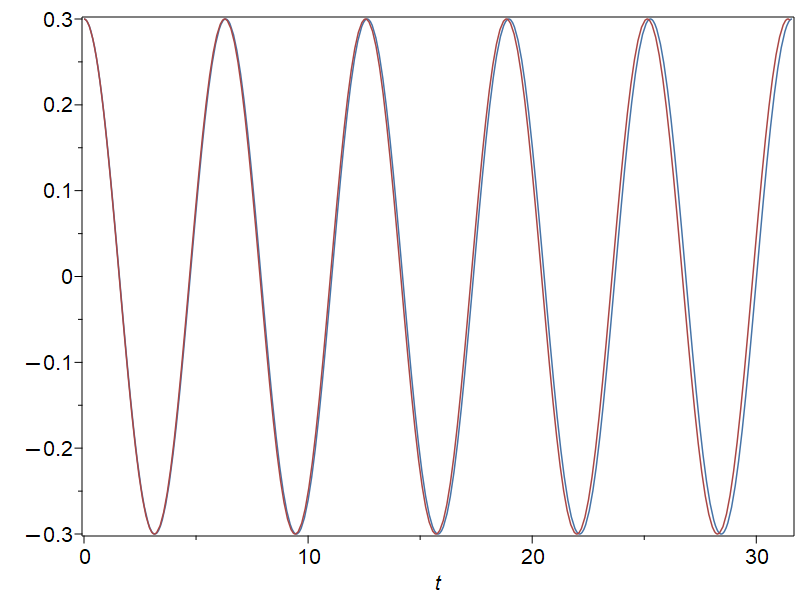

In [5]:
k := sin(A/2);
T := 4*EllipticK(k);
Theta := 2*arcsin( k*JacobiSN( t+T/4, k ) );
A := 0.3;
ReferencePlot := plot( Theta, t=0..5*T, colour="Executive Blue" );
HarmonicPlot := plot( y, t=0..5*T, colour="Executive Red" );
plots[display](ReferencePlot,HarmonicPlot)

As predicted by the growth of the residual, we see that the reference solution and the simple harmonic solution steadily drift apart.  The periods of the two oscillations are slightly different.


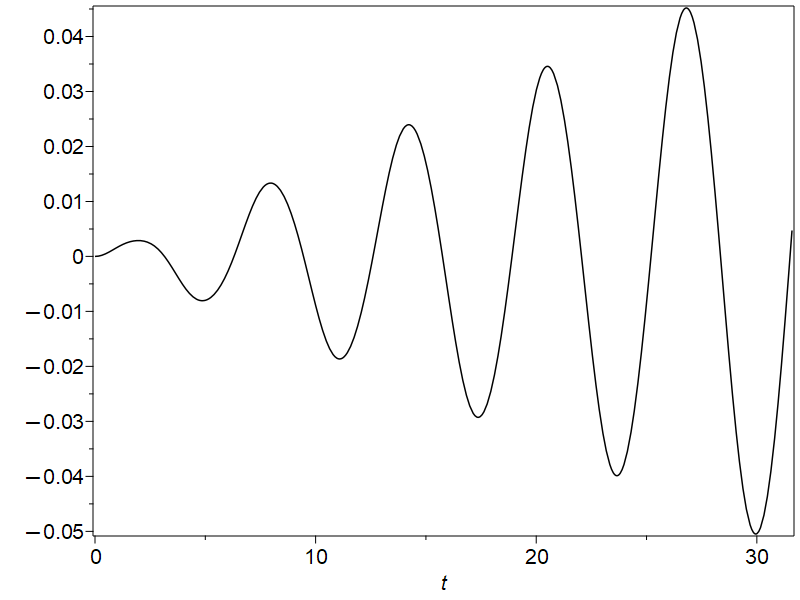

In [6]:
plot( Theta-y, t=0..5*T );